# Wiersma+2009 cooling table

Data from:

https://www.strw.leidenuniv.nl/WSS08

https://www.strw.leidenuniv.nl/WSS08/z_collis.txt

In [1]:
import sys
sys.path.insert(0, '../python')
import cool_tigress as ct

In [7]:
# %load '../data/Wiersma09_z_collis_README.txt'

In [2]:
import pandas as pd

fname = '../data/Wiersma09_z_collis.txt'
df = pd.read_csv(fname, sep='\s+', header=None,
                 names=['Temp', 'Lambda_HHe', 'xe', 'Lambda_Metal'],
                 usecols=[0, 11, 12, 15], squeeze=True)
df['Lambda'] = df['Lambda_HHe'] + df['Lambda_Metal'] 

Text(0, 0.5, 'x_e')

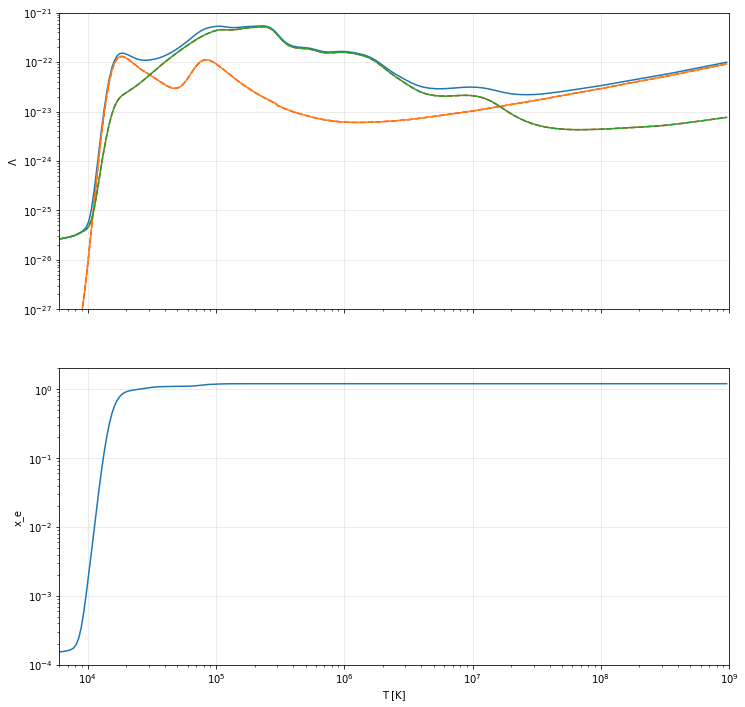

In [3]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

plt.sca(axes[0])
plt.loglog(df['Temp'], ct.coolingHotHHe(df.Temp), 'r--')
plt.loglog(df['Temp'], ct.coolingHotMetal(df.Temp, 1), 'r--')
plt.loglog(df['Temp'], df['Lambda'], '-')
plt.loglog(df['Temp'], df['Lambda_HHe'], '-')
plt.loglog(df['Temp'], df['Lambda_Metal'], '-')
plt.xlim(5e3, 1e9)
plt.ylim(1e-27,1e-21)
plt.ylabel(r'$\Lambda$')
plt.grid()
plt.gca().grid(which='major', alpha=0.3)

plt.sca(axes[1])
plt.loglog(df['Temp'], df['xe'], '-')
plt.loglog(ct.coolingHdf['Temp'], df['xe'], '-')
plt.xlim(6e3, 1e9)
plt.ylim(1e-4, 2e0)
plt.grid()
plt.gca().grid(which='major', alpha=0.3)
plt.xlabel('T [K]')
plt.ylabel('x_e')

* How to make $x_e(T)$ to depend on metallicity?

## Generate table for cool_tigress.c (logarithmically equally spaced) 
### Copy and paste printed numpy arrays

In [24]:
from scipy.interpolate import interp1d

logTmin = 3.79
df['logT'] = np.log10(df.Temp)

xin = np.array(df.loc[df['logT'] > logTmin, 'logT'])
yin_LHHe = np.log10(df.loc[df['logT'] > logTmin, 'Lambda_HHe'])
yin_LM = np.log10(df.loc[df['logT'] > logTmin, 'Lambda_Metal'])
yin_xe = df.loc[df['logT'] > logTmin, 'xe']

fLHHe = interp1d(xin, yin_LHHe)
fLM = interp1d(xin, yin_LM)
fxe = interp1d(xin, yin_xe)

dlog10T = 0.01
log10T_min = 3.8
log10T_max = 8.98
xout = np.arange(log10T_min, log10T_max + dlog10T, dlog10T)

print('Tmin/Tmax', 10.0**log10T_min, 10.0**log10T_max)
print('length of array', len(xout))
print('dlog10T', dlog10T)
xout
#fLHHe(xout)
#fLM(xout)
#fxe(xout)

Tmin/Tmax 6309.57344480193 954992586.0214369
length of array 519
dlog10T 0.01


array([3.8 , 3.81, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.89, 3.9 ,
       3.91, 3.92, 3.93, 3.94, 3.95, 3.96, 3.97, 3.98, 3.99, 4.  , 4.01,
       4.02, 4.03, 4.04, 4.05, 4.06, 4.07, 4.08, 4.09, 4.1 , 4.11, 4.12,
       4.13, 4.14, 4.15, 4.16, 4.17, 4.18, 4.19, 4.2 , 4.21, 4.22, 4.23,
       4.24, 4.25, 4.26, 4.27, 4.28, 4.29, 4.3 , 4.31, 4.32, 4.33, 4.34,
       4.35, 4.36, 4.37, 4.38, 4.39, 4.4 , 4.41, 4.42, 4.43, 4.44, 4.45,
       4.46, 4.47, 4.48, 4.49, 4.5 , 4.51, 4.52, 4.53, 4.54, 4.55, 4.56,
       4.57, 4.58, 4.59, 4.6 , 4.61, 4.62, 4.63, 4.64, 4.65, 4.66, 4.67,
       4.68, 4.69, 4.7 , 4.71, 4.72, 4.73, 4.74, 4.75, 4.76, 4.77, 4.78,
       4.79, 4.8 , 4.81, 4.82, 4.83, 4.84, 4.85, 4.86, 4.87, 4.88, 4.89,
       4.9 , 4.91, 4.92, 4.93, 4.94, 4.95, 4.96, 4.97, 4.98, 4.99, 5.  ,
       5.01, 5.02, 5.03, 5.04, 5.05, 5.06, 5.07, 5.08, 5.09, 5.1 , 5.11,
       5.12, 5.13, 5.14, 5.15, 5.16, 5.17, 5.18, 5.19, 5.2 , 5.21, 5.22,
       5.23, 5.24, 5.25, 5.26, 5.27, 5.28, 5.29, 5.

# Table 1.4 in Draine (2011) : Protosolar abundances of the Elements with $Z \le 32$ (based on Asplund+2009)

In [365]:
a = AbundanceSolar(nHe_nH=9.55e-2, Zprime=1.0)
a.get_XYZ_muH_mu()

{'xHe': 0.0955,
 'xMetal': 0.0011411559179,
 'X': 0.7147569280618075,
 'Y': 0.27104625065957166,
 'Z': 0.014196821278621007,
 'muH': 1.4102696461206388,
 'mu_ato': 1.2757838079773176,
 'mu_ion': 0.6089421228488935,
 'xe_ion': 1.2009122196575999}

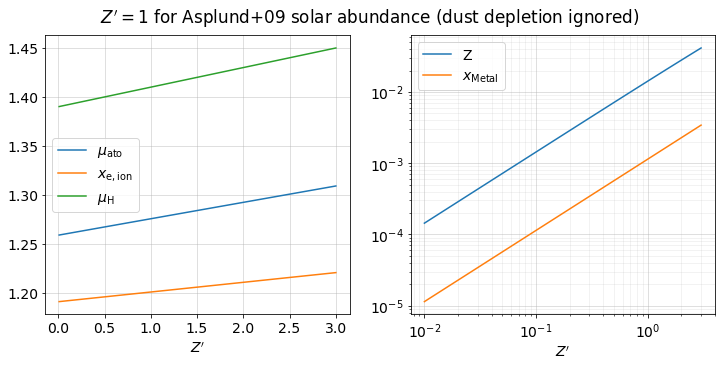

In [366]:
from abundance_solar import AbundanceSolar

mpl.rcParams['font.size'] = 14
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
Zp = np.array([0.1, 0.5, 1.0, 1.5, 2.0])
Zps = np.logspace(-2, np.log10(3.0))

rr = dict()
for i, Zp in enumerate(Zps):
    a = AbundanceSolar(Zprime=Zp)
    r = a.get_XYZ_muH_mu()
    if i == 0:
        for k in r.keys():
            rr[k] = np.empty((0,))

    for k in r.keys():
        rr[k] = np.append(rr[k], r[k])
        
plt.sca(axes[0])
plt.plot(Zps, rr['mu_ato'], label=r'$\mu_{\rm ato}$')
plt.plot(Zps, rr['xe_ion'], label=r'$x_{\rm e,ion}$')
plt.plot(Zps, rr['muH'], label=r'$\mu_{\rm H}$')
#plt.xscale('log')
plt.xlabel(r'$Z^{\prime}$')
plt.legend()
plt.grid()
plt.gca().grid(which='minor', alpha=0.2)
plt.gca().grid(which='major', alpha=0.5)

plt.sca(axes[1])
plt.plot(Zps, rr['Z'], label='Z')
plt.plot(Zps, rr['xMetal'], label=r'$x_{\rm Metal}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$Z^{\prime}$')
plt.legend()
plt.grid()
plt.gca().grid(which='minor', alpha=0.2)
plt.gca().grid(which='major', alpha=0.5)

plt.suptitle(r'$Z^{\prime}=1$ for Asplund+09 solar abundance '
             + r'(dust depletion ignored)')
plt.subplots_adjust(top=0.9)

# Chang-Goo's note

## CIE cooling in Sutherland & Dopita (1993; SD93)

### From Abundance Table (Table 4)
    
| Spicies | -log(ni/nH) | Z_i | A_i |Spicies | -log(ni/nH) | Z_i | A_i |
| --- | --- | --- | --- |--- | --- | --- | --- |
| H | 0.0 | 1 | 1 | He|-1.01| 2 | 4 |
| C | -3.44 | 6 | 12 | N | -3.95 | 7 | 14 |
| O | -3.07 | 8 | 16 | Ne | -3.91 | 10 | 20.2 |
| Na | -5.67 | 11 | 23 | Mg | -4.42 | 12 |24.3 |
| Al | -5.53 | 13 | 27 | Si | -4.45 | 14 | 28.1 |
| S | -4.79 | 16 | 32.1 | Cl | -6.5 | 17 | 35.5 |
| Ar | -5.44 | 18 | 39.9 | Ca | -5.64 | 20 | 40.1 |
| Fe | -4.33 | 26 | 55.8 | Ni | -5.75 | 28 | 58.7 |

In [109]:
n = 10.**np.array([0.0, -1.01, -3.44, -3.95, -3.07, -3.91, -5.67, -4.42, -5.53,
                   -4.45, -4.79, -6.5, -5.44, -5.64, -4.33, -5.75])
A = np.array([1,4, 12, 14, 16, 20.2, 23, 24.3, 27, 28.1, 32.1, 35.5, 39.9, 40.1, 55.8, 58.7])
Z = np.array([1,2,6,7,8,10,11, 12, 13, 14, 16, 17, 18, 20, 26, 28])
print('mu', (n*A).sum()/n.sum())
print('mu', (n*A).sum()/(n*(1 + Z)).sum())
print('muH', (n*A).sum()/n[0])

mu 1.2903022628772858
mu 0.6144689227371525
muH 1.4184586501912781


* atomic gas 
$$\mu=\sum n_i A_i / \sum n_i \approx 1.2903$$

* fully ionized gas
$$\mu=\sum n_i A_i / \sum n_i(1+Z_i) \approx0.6145$$

* Mean mass per H
$$\mu_H = \sum n_i A_i / n_H \approx 1.4185$$

### From Table 6 (this is what I used for mean molecular weights)
    
* atomic ($\log(T)<4$): $\mu = 1.295$
* fully ionized ($\log(T)>5.5$): $\mu = 0.6182$
* $\mu_H=1.4271$
* Small descrepancy between the values here and Table 4 (above) may arise from $Z_i$ and $A_i$ I read in from a periodic table.